   DrivAge  ClaimNb     Exposure  BonusMalus
0       18       65   210.689377   93.009358
1       19      243   912.874303   96.128763
2       20      335  1460.979158   95.273395
3       21      353  1819.911138   93.409060
4       22      430  2223.703357   91.191457
   DrivAge  ClaimNb     Exposure  BonusMalus  Frequency
0       18       65   210.689377   93.009358   0.308511
1       19      243   912.874303   96.128763   0.266192
2       20      335  1460.979158   95.273395   0.229298
3       21      353  1819.911138   93.409060   0.193966
4       22      430  2223.703357   91.191457   0.193371
              IDpol        ClaimNb       Exposure       VehPower  \
count  6.780130e+05  678013.000000  678013.000000  678013.000000   
mean   2.621857e+06       0.053247       0.528545       6.454631   
std    1.641783e+06       0.240117       0.364081       2.050906   
min    1.000000e+00       0.000000       0.002732       4.000000   
25%    1.157951e+06       0.000000       0.180000     

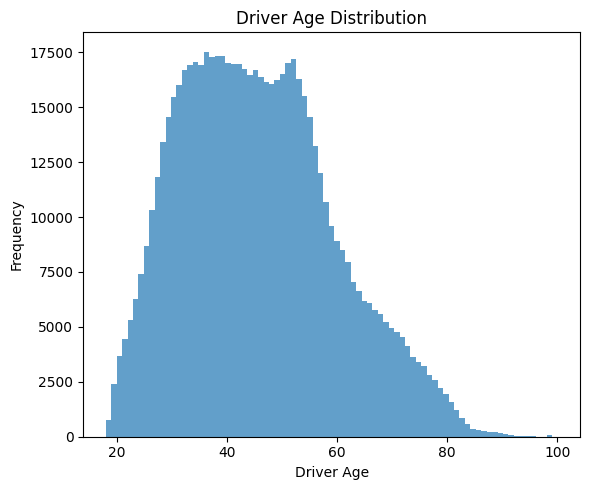

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

mtlp_data = pd.read_csv("freMTPL2freq.csv")
mtlp_data["Exposure"] = mtlp_data["Exposure"].clip(upper=1.0)

mtlp_age_count = mtlp_data["DrivAge"].nunique()

age_stats = mtlp_data.groupby("DrivAge").agg({
    "ClaimNb": "sum",
    "Exposure": "sum",
    "BonusMalus": "mean"
}).reset_index()

print(age_stats.head())

age_stats["Frequency"] = age_stats["ClaimNb"] / age_stats["Exposure"]

print(age_stats.head())


# Display basic statistics of the dataset
print(mtlp_data.describe())

fig, ax = plt.subplots(figsize=(6, 5))

plot_data = age_stats[(age_stats["DrivAge"] >= 18) & (age_stats["DrivAge"] <= 90)]

ax.hist(mtlp_data["DrivAge"], bins=mtlp_age_count, alpha=0.7)
ax.set_title("Driver Age Distribution")
ax.set_xlabel("Driver Age")
ax.set_ylabel("Frequency")


plt.tight_layout()
plt.show()

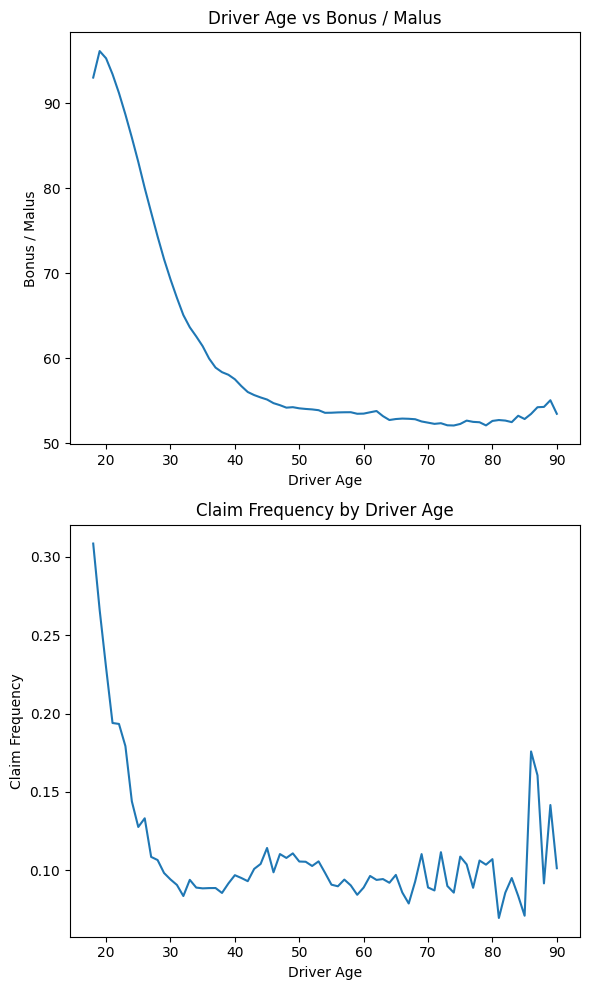

In [3]:

fig, ax = plt.subplots(2, 1, figsize=(6, 10))

sns.lineplot(data=plot_data, x="DrivAge", y="BonusMalus", ax=ax[0])
ax[0].set_title("Driver Age vs Bonus / Malus")
ax[0].set_xlabel("Driver Age")
ax[0].set_ylabel("Bonus / Malus")

sns.lineplot(data=plot_data, x="DrivAge", y="Frequency", ax=ax[1])
ax[1].set_title("Claim Frequency by Driver Age")
ax[1].set_xlabel("Driver Age")
ax[1].set_ylabel("Claim Frequency")

plt.tight_layout()
plt.show()

    VehPower  ClaimNb      Exposure  VehiclePowerCount  Frequency
0          4     5699  60055.327304             115349   0.094896
1          5     7278  68148.128821             124821   0.106797
2          6     8381  82497.590172             148976   0.101591
3          7     7627  77919.746700             145401   0.097883
4          8     1922  22673.966305              46956   0.084767
5          9     1754  15338.643656              30085   0.114352
6         10     1789  15367.090824              31354   0.116418
7         11      897   8491.308452              18352   0.105637
8         12      359   3790.798343               8214   0.094703
9         13      153   1637.035322               3229   0.093462
10        14      119   1180.020391               2350   0.100846
11        15      124   1260.449173               2926   0.098378


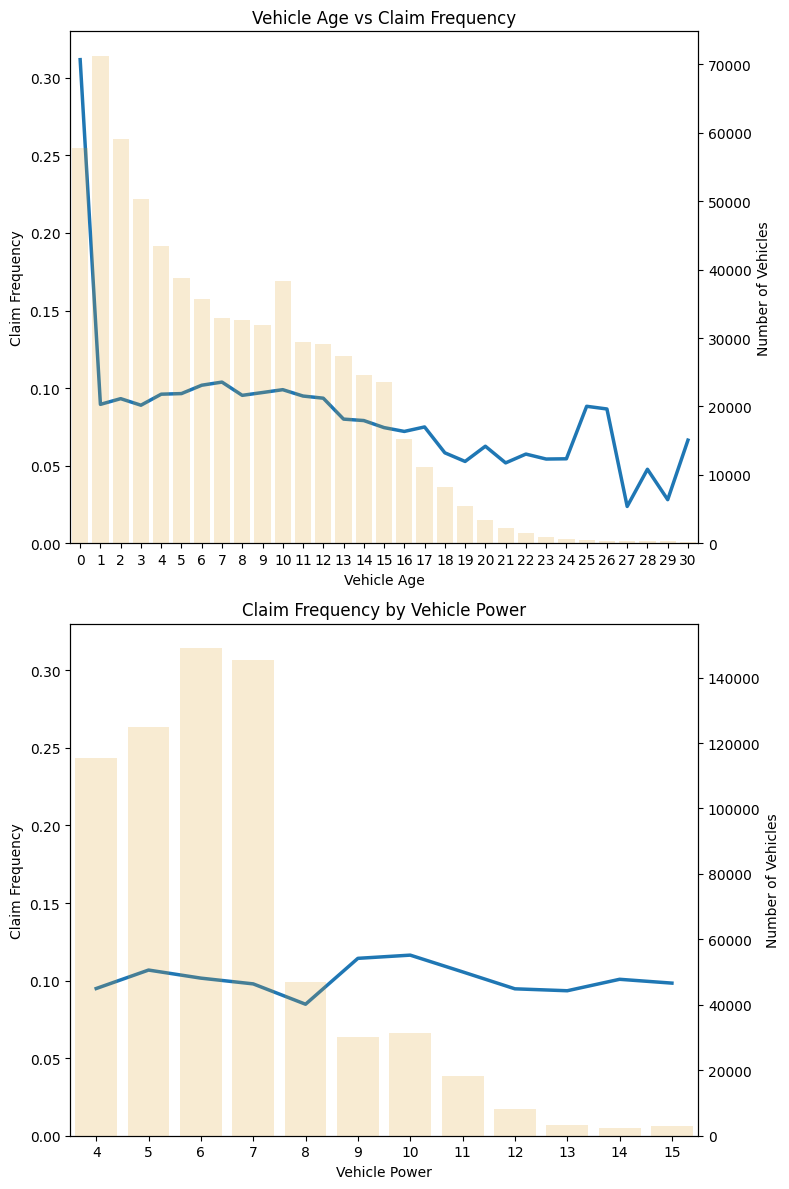

In [4]:
#print(mtlp_data.describe())

vehicle_age_stats = mtlp_data.groupby("VehAge").agg(
    ClaimNb=("ClaimNb", "sum"),
    Exposure=("Exposure", "sum"),
    VehicleCount=("VehAge", "size")
).reset_index()

vehicle_age_stats["Frequency"] = vehicle_age_stats["ClaimNb"] / vehicle_age_stats["Exposure"]

#print(vehicle_age_stats)

vehicle_plot_data = vehicle_age_stats[(vehicle_age_stats["VehAge"] >= 0) & (vehicle_age_stats["VehAge"] <= 30)]

vehicle_power_stats = mtlp_data.groupby("VehPower").agg(
    ClaimNb=("ClaimNb", "sum"),
    Exposure=("Exposure", "sum"),
    VehiclePowerCount=("VehPower", "size")
).reset_index()

vehicle_power_stats["Frequency"] = vehicle_power_stats["ClaimNb"] / vehicle_power_stats["Exposure"]

print(vehicle_power_stats)



fig, ax = plt.subplots(2, 1, figsize=(8, 12))

sns.lineplot(data=vehicle_plot_data, x="VehAge", y="Frequency", ax=ax[0], linewidth=2.5)
ax[0].set_title("Vehicle Age vs Claim Frequency")
ax[0].set_xlabel("Vehicle Age")
ax[0].set_ylabel("Claim Frequency")
ax[0].set_ylim(0, 0.33)

ax2 = ax[0].twinx()

sns.barplot(data=vehicle_plot_data, x="VehAge", y="VehicleCount", ax=ax2, color='orange', alpha=0.2)
ax2.set_ylabel("Number of Vehicles")




sns.lineplot(data=vehicle_power_stats, x=vehicle_power_stats["VehPower"].index, y="Frequency", ax=ax[1], linewidth=2.5)
ax[1].set_title("Claim Frequency by Vehicle Power")
ax[1].set_xlabel("Vehicle Power")
ax[1].set_ylabel("Claim Frequency")
ax[1].set_ylim(0, 0.33)

ax3 = ax[1].twinx()

sns.barplot(data=vehicle_power_stats, x="VehPower", y="VehiclePowerCount", ax=ax3, color='orange', alpha=0.2)
ax3.set_ylabel("Number of Vehicles")

plt.tight_layout()
plt.show()

In [5]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

#print(mtlp_data.head())

mtlp_data["Exposure"] = mtlp_data["Exposure"].clip(upper=1.0)
mtlp_data["ClaimNb"] = mtlp_data["ClaimNb"].clip(upper=4)

mtlp_data["LogExposure"] = np.log(mtlp_data["Exposure"])

mtlp_data["VehPower"] = mtlp_data["VehPower"].astype(str)

formula = "ClaimNb  ~ DrivAge + VehPower"

model = smf.glm(formula=formula,
                data=mtlp_data,
                offset=mtlp_data["LogExposure"],
                family=sm.families.Poisson(link=sm.families.links.log()))

result = model.fit()
print(result.summary())

#print(mtlp_data.head())

c:\Users\paula\PythonCoding\python_practice_steps\.venv\Lib\site-packages\statsmodels\genmod\families\links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


                 Generalized Linear Model Regression Results                  
Dep. Variable:                ClaimNb   No. Observations:               678013
Model:                            GLM   Df Residuals:                   678000
Model Family:                 Poisson   Df Model:                           12
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.4645e+05
Date:                Sun, 11 Jan 2026   Deviance:                   2.2359e+05
Time:                        12:20:40   Pearson chi2:                 1.91e+06
No. Iterations:                     7   Pseudo R-squ. (CS):          0.0005013
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.9335      0.029    -65.

c:\Users\paula\PythonCoding\python_practice_steps\.venv\Lib\site-packages\statsmodels\genmod\families\links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


                 Generalized Linear Model Regression Results                  
Dep. Variable:                ClaimNb   No. Observations:               678013
Model:                            GLM   Df Residuals:                   677999
Model Family:        NegativeBinomial   Df Model:                           13
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.4582e+05
Date:                Sun, 11 Jan 2026   Deviance:                   1.9516e+05
Time:                        12:20:46   Pearson chi2:                 1.85e+06
No. Iterations:                     7   Pseudo R-squ. (CS):          0.0007911
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -1.2204      0.056    -

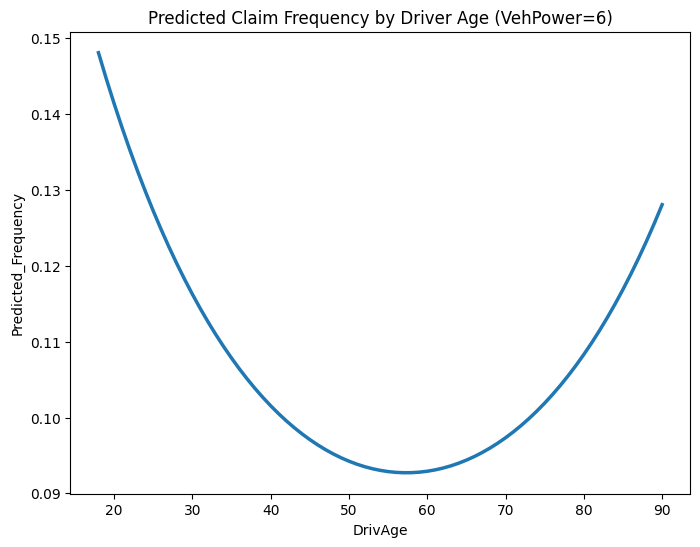

In [6]:
import statsmodels.api as sm
import statsmodels.formula.api as smf


mtlp_data["Exposure"] = mtlp_data["Exposure"].clip(upper=1.0)
mtlp_data["ClaimNb"] = mtlp_data["ClaimNb"].clip(upper=4)

mtlp_data["LogExposure"] = np.log(mtlp_data["Exposure"])

mtlp_data["VehPower"] = mtlp_data["VehPower"].astype(str)

formula_improved = "ClaimNb  ~ DrivAge + I(DrivAge**2) + VehPower"

model_negative_binomial = smf.glm(formula=formula_improved,
                data=mtlp_data,
                offset=mtlp_data["LogExposure"],
                family=sm.families.NegativeBinomial(alpha=1.0, link=sm.families.links.log()))

result_nb = model_negative_binomial.fit()
print(result_nb.summary())


ages = range(18, 91)

synthetic_data = pd.DataFrame({
    "DrivAge": ages,
    "VehPower": "6",
    "LogExposure": 0.0
})

synthetic_data["Predicted_Frequency"] = result_nb.predict(synthetic_data)

plt.figure(figsize=(8, 6))
sns.lineplot(data=synthetic_data, x="DrivAge", y="Predicted_Frequency", linewidth=2.5)
plt.title("Predicted Claim Frequency by Driver Age (VehPower=6)")

plt.show()



c:\Users\paula\PythonCoding\python_practice_steps\.venv\Lib\site-packages\statsmodels\genmod\families\links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


                 Generalized Linear Model Regression Results                  
Dep. Variable:                ClaimNb   No. Observations:               678013
Model:                            GLM   Df Residuals:                   677999
Model Family:        NegativeBinomial   Df Model:                           13
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.4582e+05
Date:                Sun, 11 Jan 2026   Deviance:                   1.9516e+05
Time:                        12:20:52   Pearson chi2:                 1.85e+06
No. Iterations:                     7   Pseudo R-squ. (CS):          0.0007911
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -1.2204      0.056    -

c:\Users\paula\PythonCoding\python_practice_steps\.venv\Lib\site-packages\statsmodels\genmod\families\links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


                 Generalized Linear Model Regression Results                  
Dep. Variable:                ClaimNb   No. Observations:               678013
Model:                            GLM   Df Residuals:                   677997
Model Family:        NegativeBinomial   Df Model:                           15
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.4283e+05
Date:                Sun, 11 Jan 2026   Deviance:                   1.8918e+05
Time:                        12:20:59   Pearson chi2:                 1.70e+06
No. Iterations:                     8   Pseudo R-squ. (CS):           0.009578
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -4.0817      0.074    -

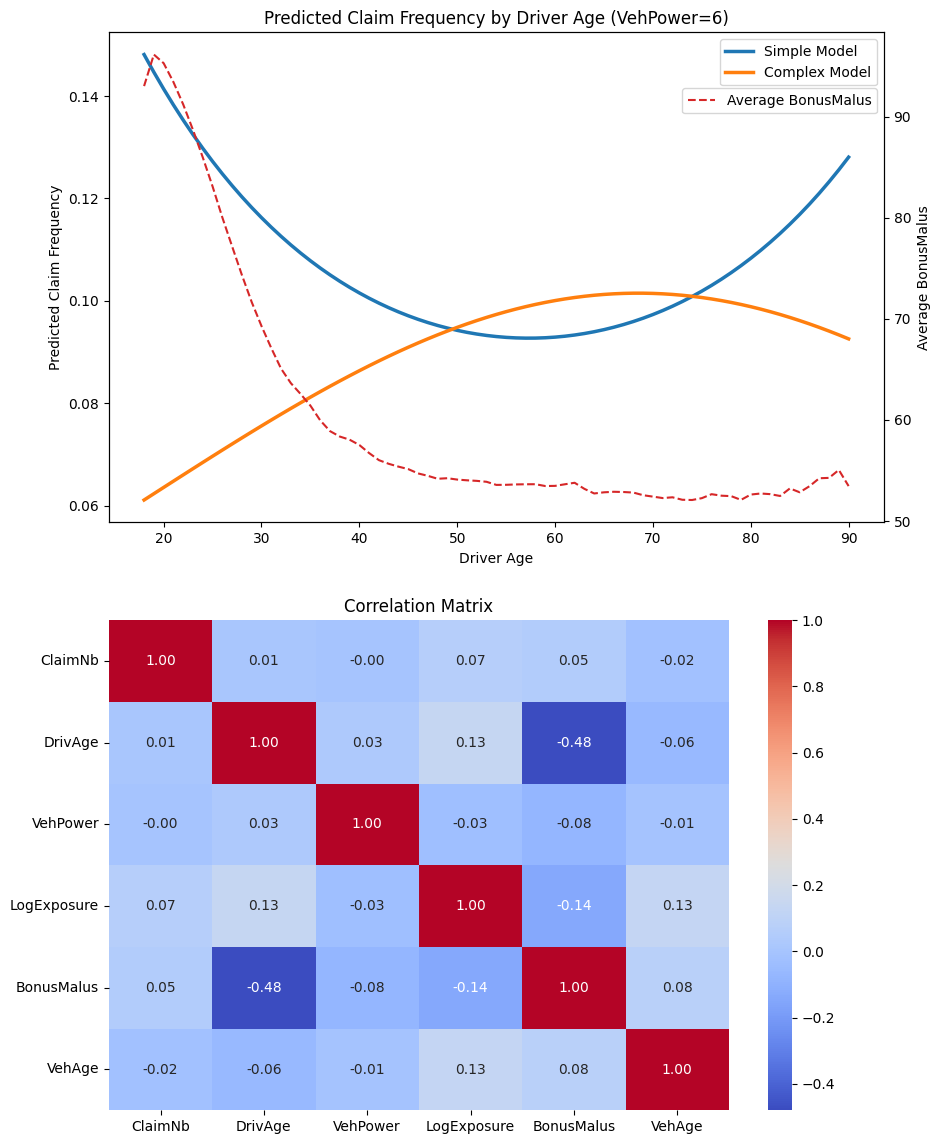

In [7]:
import statsmodels.api as sm
import statsmodels.formula.api as smf


# Preparing the data
mtlp_data["Exposure"] = mtlp_data["Exposure"].clip(upper=1.0)
mtlp_data["ClaimNb"] = mtlp_data["ClaimNb"].clip(upper=4)
mtlp_data["LogExposure"] = np.log(mtlp_data["Exposure"])
mtlp_data["VehPower"] = mtlp_data["VehPower"].astype(str)


# Defining and fitting the simple Negative Binomial model
formula_simple = "ClaimNb  ~ DrivAge + I(DrivAge**2) + VehPower"

model_negative_binomial_simple = smf.glm(formula=formula_simple,
                data=mtlp_data,
                offset=mtlp_data["LogExposure"],
                family=sm.families.NegativeBinomial(alpha=1.0, link=sm.families.links.log()))

result_simple = model_negative_binomial_simple.fit()
print(result_simple.summary())


# Defining and fitting the complex Negative Binomial model
formula_complex = "ClaimNb  ~ DrivAge + I(DrivAge**2) + VehPower + BonusMalus + VehAge"

model_negative_binomial_complex = smf.glm(formula=formula_complex,
                data=mtlp_data,
                offset=mtlp_data["LogExposure"],
                family=sm.families.NegativeBinomial(alpha=1.0, link=sm.families.links.log()))

result_complex = model_negative_binomial_complex.fit()
print(result_complex.summary())


# Generating synthetic data for predictions
ages = range(18, 91)

synthetic_data = pd.DataFrame({
    "DrivAge": ages,
    "VehPower": "6",
    "LogExposure": 0.0,
})


synthetic_data["Predicted_Frequency_Simple"] = result_simple.predict(synthetic_data)

synthetic_data["BonusMalus"] = 50
synthetic_data["VehAge"] = 5
synthetic_data["Predicted_Frequency_Complex"] = result_complex.predict(synthetic_data)


# Calculating average BonusMalus by DrivAge
age_stats = mtlp_data.groupby("DrivAge")["BonusMalus"].mean().reset_index()

synthetic_data = synthetic_data.merge(age_stats, on="DrivAge", how="left")

print(synthetic_data.head())

# Calculating correlation matrix
corr_cols = ["ClaimNb", "DrivAge", "VehPower", "LogExposure", "BonusMalus", "VehAge"]
correlation_matrix = mtlp_data[corr_cols].corr()


# Plotting the results
fig, ax = plt.subplots(2, 1, figsize=(10, 14))

sns.lineplot(data=synthetic_data, x="DrivAge", y="Predicted_Frequency_Simple", linewidth=2.5, color="tab:blue", ax=ax[0], label="Simple Model")
sns.lineplot(data=synthetic_data, x="DrivAge", y="Predicted_Frequency_Complex", linewidth=2.5, color="tab:orange", ax=ax[0], label="Complex Model")
ax[0].set_title("Predicted Claim Frequency by Driver Age (VehPower=6)")
ax[0].set_xlabel("Driver Age")
ax[0].set_ylabel("Predicted Claim Frequency")
ax[0].legend()


ax2 = ax[0].twinx()

sns.lineplot(data=synthetic_data, x="DrivAge", y="BonusMalus_y", color="tab:red", ax=ax2, label="Average BonusMalus", linestyle="--")
ax2.set_ylabel("Average BonusMalus")
ax2.legend(loc='upper right', bbox_to_anchor=(1,0.9))


sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", ax=ax[1])
ax[1].set_title("Correlation Matrix")

plt.show()

c:\Users\paula\PythonCoding\python_practice_steps\.venv\Lib\site-packages\statsmodels\genmod\families\links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


                 Generalized Linear Model Regression Results                  
Dep. Variable:                ClaimNb   No. Observations:               678013
Model:                            GLM   Df Residuals:                   677999
Model Family:        NegativeBinomial   Df Model:                           13
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.4582e+05
Date:                Sun, 11 Jan 2026   Deviance:                   1.9516e+05
Time:                        12:21:07   Pearson chi2:                 1.85e+06
No. Iterations:                     7   Pseudo R-squ. (CS):          0.0007911
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -1.2204      0.056    -

c:\Users\paula\PythonCoding\python_practice_steps\.venv\Lib\site-packages\statsmodels\genmod\families\links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


                 Generalized Linear Model Regression Results                  
Dep. Variable:                ClaimNb   No. Observations:               678013
Model:                            GLM   Df Residuals:                   677997
Model Family:        NegativeBinomial   Df Model:                           15
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.4283e+05
Date:                Sun, 11 Jan 2026   Deviance:                   1.8918e+05
Time:                        12:21:14   Pearson chi2:                 1.70e+06
No. Iterations:                     8   Pseudo R-squ. (CS):           0.009578
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -4.0817      0.074    -

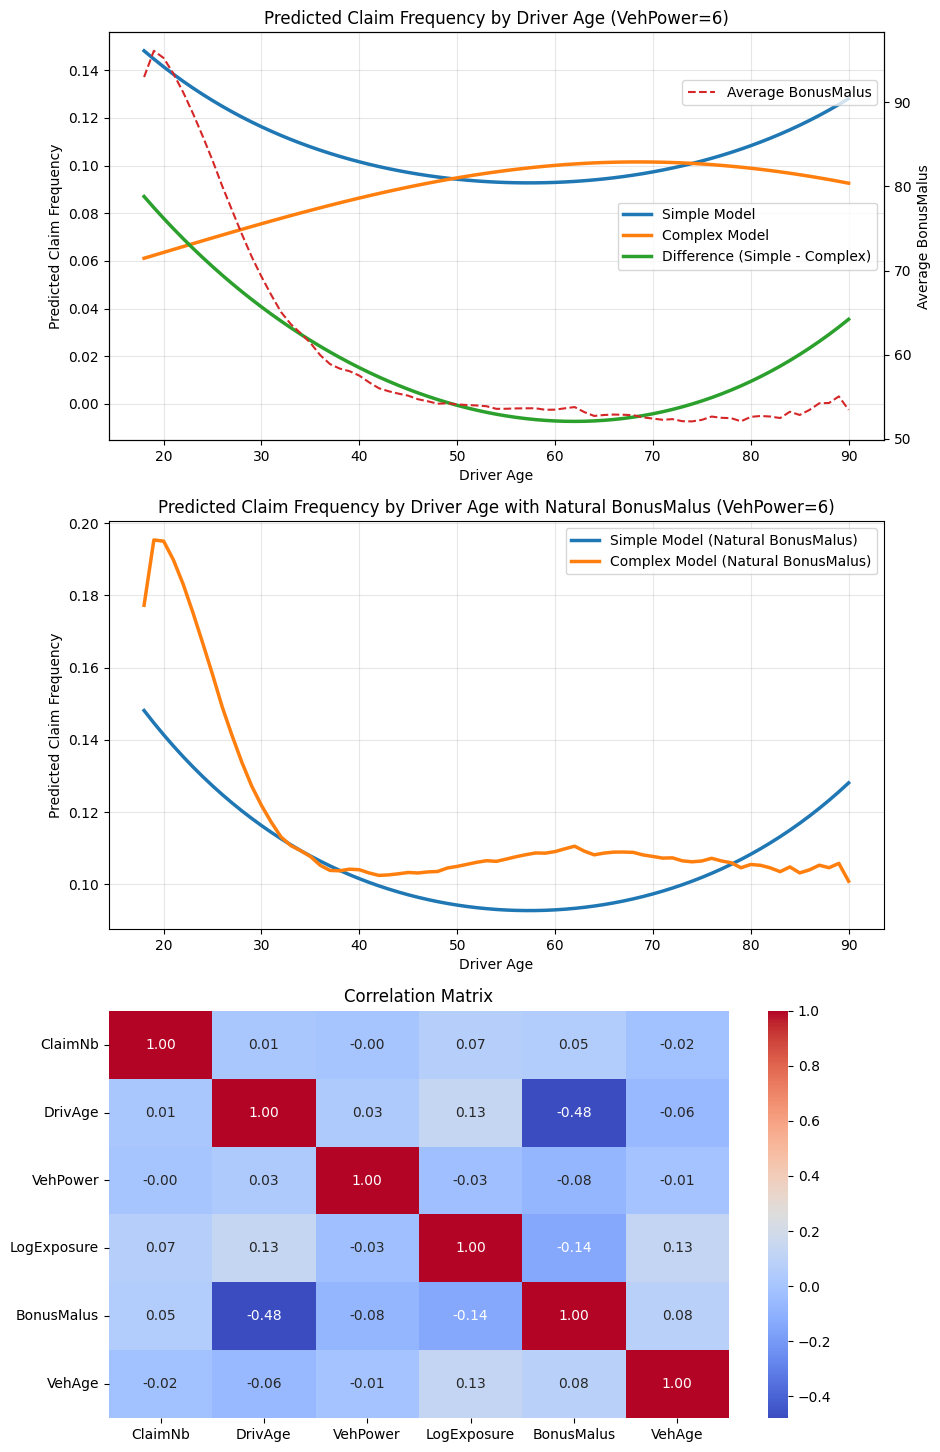

In [8]:
import statsmodels.api as sm
import statsmodels.formula.api as smf


# Preparing the data
mtlp_data["Exposure"] = mtlp_data["Exposure"].clip(upper=1.0)
mtlp_data["ClaimNb"] = mtlp_data["ClaimNb"].clip(upper=4)
mtlp_data["LogExposure"] = np.log(mtlp_data["Exposure"])
mtlp_data["VehPower"] = mtlp_data["VehPower"].astype(str)


# Defining and fitting the simple Negative Binomial model
formula_simple = "ClaimNb  ~ DrivAge + I(DrivAge**2) + VehPower"

model_negative_binomial_simple = smf.glm(formula=formula_simple,
                data=mtlp_data,
                offset=mtlp_data["LogExposure"],
                family=sm.families.NegativeBinomial(alpha=1.0, link=sm.families.links.log()))

result_simple = model_negative_binomial_simple.fit()
print(result_simple.summary())


# Defining and fitting the complex Negative Binomial model
formula_complex = "ClaimNb  ~ DrivAge + I(DrivAge**2) + VehPower + BonusMalus + VehAge"

model_negative_binomial_complex = smf.glm(formula=formula_complex,
                data=mtlp_data,
                offset=mtlp_data["LogExposure"],
                family=sm.families.NegativeBinomial(alpha=1.0, link=sm.families.links.log()))

result_complex = model_negative_binomial_complex.fit()
print(result_complex.summary())


# Generating synthetic data for predictions
ages = range(18, 91)

synthetic_data = pd.DataFrame({
    "DrivAge": ages,
    "VehPower": "6",
    "LogExposure": 0.0,
})


synthetic_data["Predicted_Frequency_Simple"] = result_simple.predict(synthetic_data)

synthetic_data["BonusMalus"] = 50
synthetic_data["VehAge"] = 5
synthetic_data["Predicted_Frequency_Complex"] = result_complex.predict(synthetic_data)


# Calculating average BonusMalus by DrivAge
age_stats = mtlp_data.groupby("DrivAge")["BonusMalus"].mean().reset_index()

synthetic_data = synthetic_data.merge(age_stats, on="DrivAge", how="left")


# Generating synthetic data with natural BonusMalus for predictions
synthetic_natural = pd.DataFrame({
    "DrivAge": range(18, 91),
    "VehPower": "6",
    "LogExposure": 0.0,
    "VehAge": 5
})

synthetic_natural = synthetic_natural.merge(age_stats, on="DrivAge", how="left")

synthetic_natural["Predicted_Frequency_Complex_Natural"] = result_complex.predict(synthetic_natural)
synthetic_natural["Predicted _Frequency_Simple_Natural"] = result_simple.predict(synthetic_natural)



# Calculating correlation matrix
corr_cols = ["ClaimNb", "DrivAge", "VehPower", "LogExposure", "BonusMalus", "VehAge"]
correlation_matrix = mtlp_data[corr_cols].corr()


simple_complex_diff = synthetic_data["Predicted_Frequency_Simple"] - synthetic_data["Predicted_Frequency_Complex"]

# Plotting the results
fig, ax = plt.subplots(3, 1, figsize=(10, 18
                                      ))

sns.lineplot(data=synthetic_data, x="DrivAge", y="Predicted_Frequency_Simple", linewidth=2.5, color="tab:blue", ax=ax[0], label="Simple Model")
sns.lineplot(data=synthetic_data, x="DrivAge", y="Predicted_Frequency_Complex", linewidth=2.5, color="tab:orange", ax=ax[0], label="Complex Model")
sns.lineplot(data=synthetic_data, x="DrivAge", y=simple_complex_diff, linewidth=2.5, color="tab:green", ax=ax[0], label="Difference (Simple - Complex)")
ax[0].set_title("Predicted Claim Frequency by Driver Age (VehPower=6)")
ax[0].set_xlabel("Driver Age")
ax[0].set_ylabel("Predicted Claim Frequency")
ax[0].legend()
ax[0].grid(True, alpha=0.3)


ax2 = ax[0].twinx()

sns.lineplot(data=synthetic_data, x="DrivAge", y="BonusMalus_y", color="tab:red", ax=ax2, label="Average BonusMalus", linestyle="--")
ax2.set_ylabel("Average BonusMalus")
ax2.legend(loc='upper right', bbox_to_anchor=(1,0.9))

sns.lineplot(data=synthetic_natural, x="DrivAge", y="Predicted _Frequency_Simple_Natural", linewidth=2.5, color="tab:blue", ax=ax[1], label="Simple Model (Natural BonusMalus)")
sns.lineplot(data=synthetic_natural, x="DrivAge", y="Predicted_Frequency_Complex_Natural", linewidth=2.5, color="tab:orange", ax=ax[1], label="Complex Model (Natural BonusMalus)")
ax[1].set_title("Predicted Claim Frequency by Driver Age with Natural BonusMalus (VehPower=6)")
ax[1].set_xlabel("Driver Age")
ax[1].set_ylabel("Predicted Claim Frequency")
ax[1].legend()
ax[1].grid(True, alpha=0.3)



sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", ax=ax[2])
ax[2].set_title("Correlation Matrix")

plt.show()

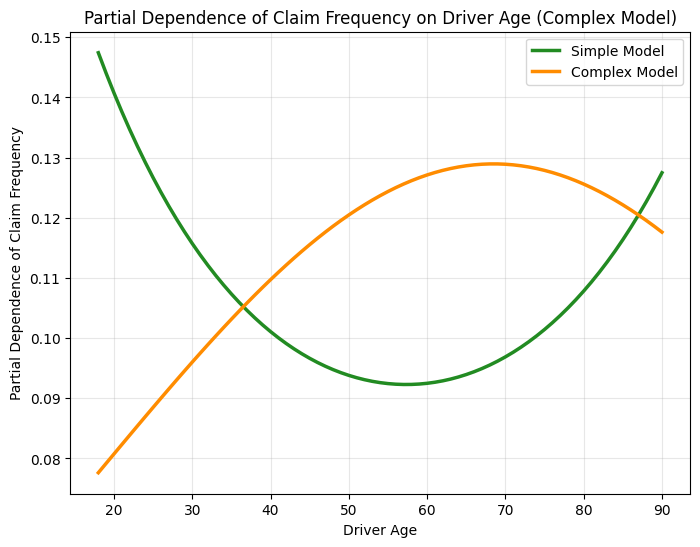

In [9]:
from sklearn.inspection import PartialDependenceDisplay

pdp_results_simple = []
pdp_results_complex = []

for age in ages:
    temp_df = mtlp_data.copy()
    temp_df["DrivAge"] = age

    pred_complex = result_complex.predict(temp_df)
    pdp_results_complex.append(pred_complex.mean())

    pred_simple = result_simple.predict(temp_df)
    pdp_results_simple.append(pred_simple.mean())

fig, ax = plt.subplots(figsize=(8, 6))

sns.lineplot(x=ages, y=pdp_results_simple, linewidth=2.5, color="forestgreen", ax=ax, label="Simple Model")
sns.lineplot(x=ages, y=pdp_results_complex, linewidth=2.5, color="darkorange", ax=ax, label="Complex Model")
ax.set_title("Partial Dependence of Claim Frequency on Driver Age (Complex Model)")
ax.set_xlabel("Driver Age")
ax.set_ylabel("Partial Dependence of Claim Frequency")
ax.grid(True, alpha=0.3)
ax.legend()

plt.show()


Simple Model AIC:  291671.06
Complex Model AIC: 285686.18


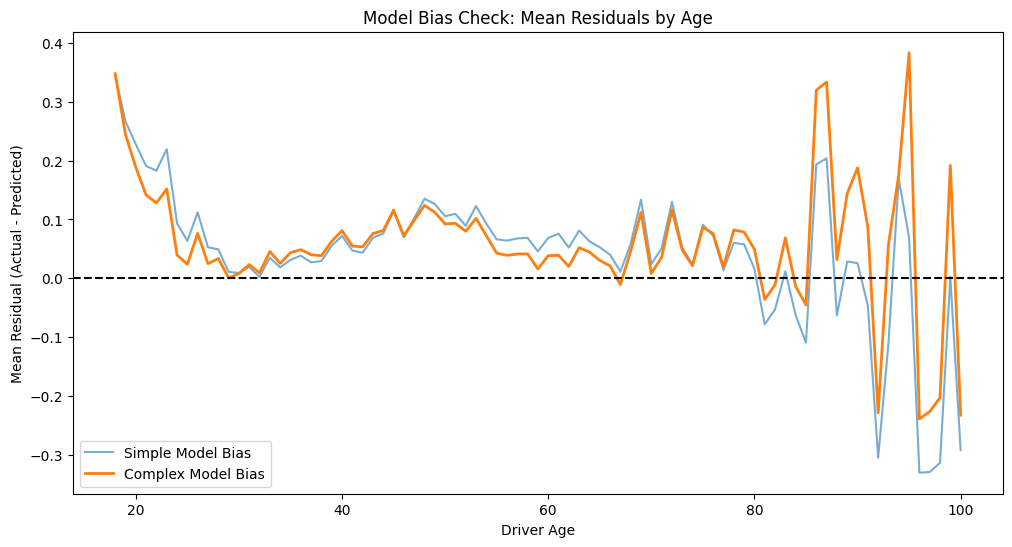

In [10]:

print(f"Simple Model AIC:  {result_simple.aic:.2f}")
print(f"Complex Model AIC: {result_complex.aic:.2f}")


mtlp_data["Resid_Simple"] = result_simple.resid_pearson
mtlp_data["Resid_Complex"] = result_complex.resid_pearson


resid_comparison = mtlp_data.groupby("DrivAge").agg({
    "Resid_Simple": "mean",
    "Resid_Complex": "mean"
}).reset_index()


plt.figure(figsize=(12, 6))
sns.lineplot(data=resid_comparison, x="DrivAge", y="Resid_Simple", label="Simple Model Bias", alpha=0.6)
sns.lineplot(data=resid_comparison, x="DrivAge", y="Resid_Complex", label="Complex Model Bias", linewidth=2)

plt.axhline(0, color='black', linestyle='--') # The "Perfect Fit" line
plt.title("Model Bias Check: Mean Residuals by Age")
plt.ylabel("Mean Residual (Actual - Predicted)")
plt.xlabel("Driver Age")
plt.legend()
plt.show()

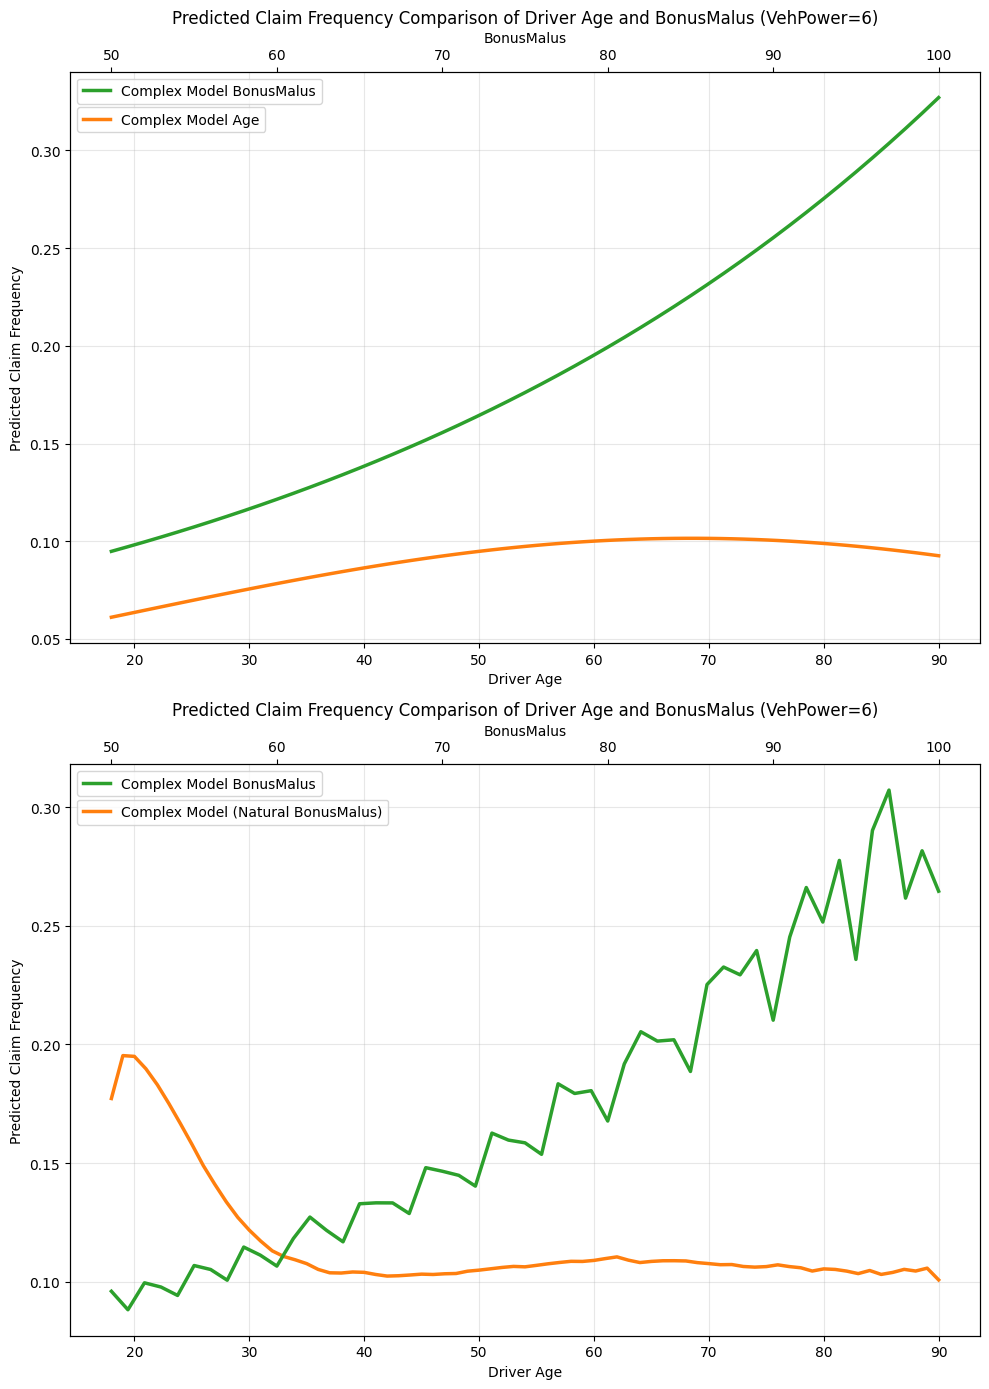

In [11]:
fig, ax = plt.subplots(2, 1, figsize=(10, 14))

# Generating synthetic data for BonusMalus predictions
bonusmalus = range (50, 101)

synthetic_data_bonusmalus = pd.DataFrame({
    "BonusMalus": bonusmalus,
    "DrivAge": 50,
    "VehPower": "6",
    "LogExposure": 0.0,
    "VehAge": 5
})

synthetic_data_bonusmalus["Predicted_Frequency_Complex_BM"] = result_complex.predict(synthetic_data_bonusmalus)

#  Calculating average DrivAge by BonusMalus and creating natural BonusMalus predictions
bonusmalus_stats = mtlp_data.groupby("BonusMalus")["DrivAge"].mean().reset_index()

synthetic_data_bonusmalus = synthetic_data_bonusmalus.merge(bonusmalus_stats, on="BonusMalus", how="left", suffixes=("_fixed",""))

synthetic_data_bonusmalus["Predicted_Frequency_Complex_BM_natural"] = result_complex.predict(synthetic_data_bonusmalus)


# Plot 1 - Comparing Driver Age and BonusMalus predictions basic

sns.lineplot(data=synthetic_data, x="DrivAge", y="Predicted_Frequency_Complex", linewidth=2.5, color="tab:orange", ax=ax[0], label="Complex Model Age")
ax[0].set_title("Predicted Claim Frequency Comparison of Driver Age and BonusMalus (VehPower=6)")
ax[0].set_xlabel("Driver Age")
ax[0].set_ylabel("Predicted Claim Frequency")
ax[0].legend(loc='upper left', bbox_to_anchor=(0, 0.95))
ax[0].grid(True, alpha=0.3)


ax2 = ax[0].twiny()

sns.lineplot(data=synthetic_data_bonusmalus, x="BonusMalus", y="Predicted_Frequency_Complex_BM", linewidth=2.5, color="tab:green", ax=ax2, label="Complex Model BonusMalus")
ax2.set_ylabel("Predicted Claim Frequency")
ax2.legend(loc='upper left')


# Plot 2 - Comparing Driver Age and BonusMalus predictions with natural BonusMalus

sns.lineplot(data=synthetic_natural, x="DrivAge", y="Predicted_Frequency_Complex_Natural", linewidth=2.5, color="tab:orange", ax=ax[1], label="Complex Model (Natural BonusMalus)")
ax[1].set_title("Predicted Claim Frequency Comparison of Driver Age and BonusMalus (VehPower=6)")
ax[1].set_xlabel("Driver Age")
ax[1].set_ylabel("Predicted Claim Frequency")
ax[1].legend(loc='upper left', bbox_to_anchor=(0, 0.95))
ax[1].grid(True, alpha=0.3)

ax2 = ax[1].twiny()

sns.lineplot(data=synthetic_data_bonusmalus, x="BonusMalus", y="Predicted_Frequency_Complex_BM_natural", linewidth=2.5, color="tab:green", ax=ax2, label="Complex Model BonusMalus")
ax2.set_ylabel("Predicted Claim Frequency")
ax2.legend(loc='upper left')


plt.tight_layout()
plt.show()

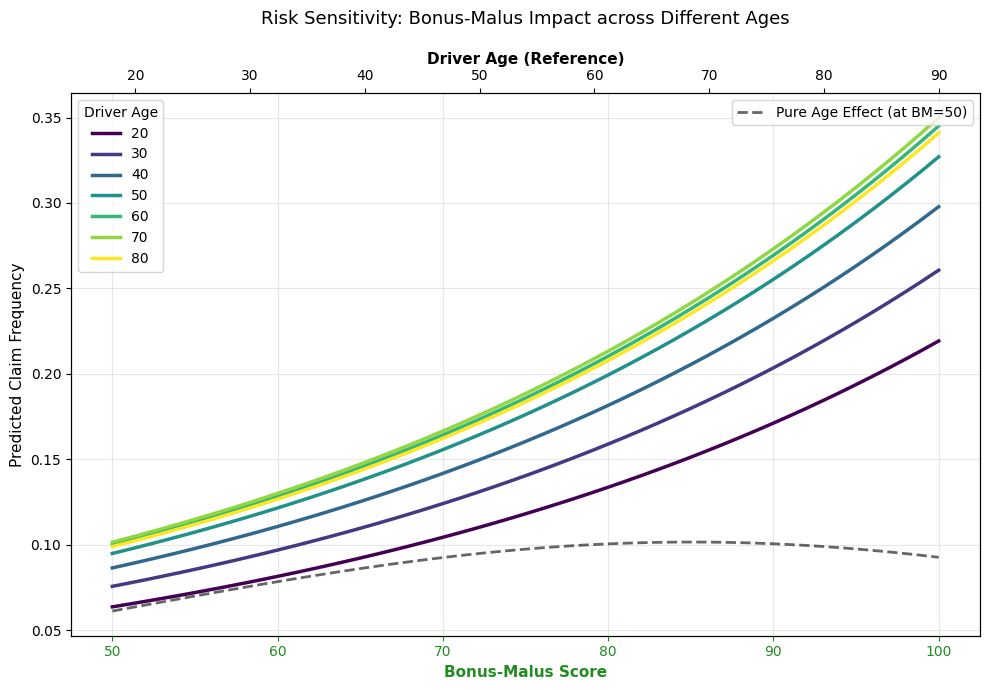

In [12]:
import itertools

# 1. Setup Data: Define the ranges we want to test
bonus_range = range(50, 101)
age_snapshots = np.arange(20, 90, 10)  # Ages: 20, 35, 50, 65, 80

# 2. Vectorized Data Generation (Cartesian Product)
# Creates a dataframe with every combination of Age and BonusMalus
data_grid = pd.DataFrame(
    list(itertools.product(bonus_range, age_snapshots)), 
    columns=["BonusMalus", "DrivAge"]
)

# Add fixed constants
data_grid["VehPower"] = "6"
data_grid["VehAge"] = 5
data_grid["LogExposure"] = 0.0

# 3. Predict for all scenarios at once
data_grid["Predicted_Frequency"] = result_complex.predict(data_grid)

# --- Reference Data for Top Axis (Pure Age Effect) ---
ref_data = pd.DataFrame({
    "DrivAge": range(18, 91),
    "BonusMalus": 50, # Fixed reference
    "VehPower": "6", "VehAge": 5, "LogExposure": 0.0
})
ref_data["Predicted_Freq_Age"] = result_complex.predict(ref_data)


# 4. Plotting
fig, ax1 = plt.subplots(figsize=(10, 7))

# --- BOTTOM AXIS: Bonus-Malus Sensitivity (Colored by Age) ---
# This replaces your loop. 'hue' creates a line for every age in 'age_snapshots'
sns.lineplot(
    data=data_grid, 
    x="BonusMalus", 
    y="Predicted_Frequency", 
    hue="DrivAge", 
    palette="viridis", 
    linewidth=2.5,
    ax=ax1
)

# Styling Bottom Axis
ax1.set_xlabel("Bonus-Malus Score", fontsize=11, fontweight='bold', color='forestgreen')
ax1.set_ylabel("Predicted Claim Frequency", fontsize=11)
ax1.set_title("Risk Sensitivity: Bonus-Malus Impact across Different Ages", fontsize=13, pad=20)
ax1.legend(title="Driver Age", loc='upper left', bbox_to_anchor=(0, 1), frameon=True)
ax1.grid(True, alpha=0.3)
ax1.tick_params(axis='x', colors='forestgreen')


# --- TOP AXIS: Pure Age Reference ---
ax2 = ax1.twiny()

sns.lineplot(
    data=ref_data, 
    x="DrivAge", 
    y="Predicted_Freq_Age", 
    color="black", 
    linestyle="--", 
    linewidth=2, 
    alpha=0.6,
    ax=ax2,
    label="Pure Age Effect (at BM=50)"
)

# Styling Top Axis
ax2.set_xlabel("Driver Age (Reference)", fontsize=11, fontweight='bold', color='black')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

Simple Model R-squared: 0.9462
Complex Model R-squared: 0.9787


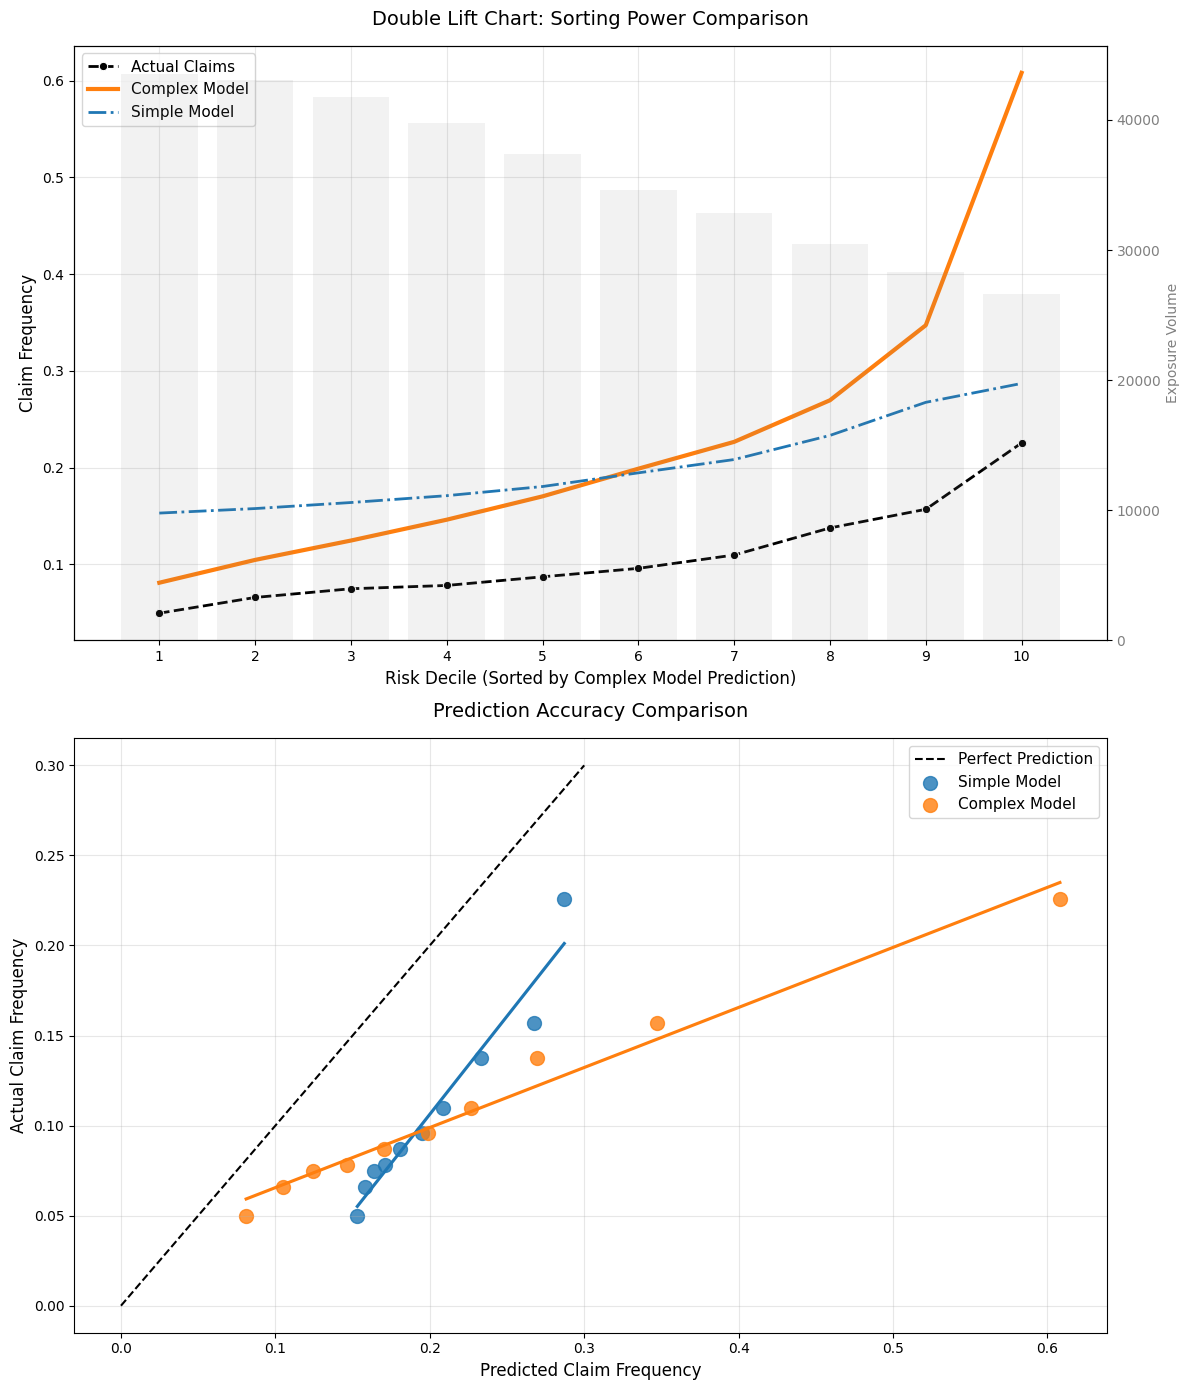

In [13]:
# Double Lift Chart: Comparing Simple vs Complex Model Sorting Power
df_lift = mtlp_data.copy()
df_lift["Predicted_Simple"] = result_simple.predict(df_lift)
df_lift["Predicted_Complex"] = result_complex.predict(df_lift)

df_lift["Decile"] = pd.qcut(df_lift["Predicted_Complex"], 10, labels=False, duplicates='drop') + 1


# Aggregate by Decile
lift_data = df_lift.groupby("Decile").apply(include_groups=False, func=
    lambda x: pd.Series({
        "Average_Actual": x["ClaimNb"].sum() / x["Exposure"].sum(),
        "Average_Simple": x["Predicted_Simple"].sum() / x["Exposure"].sum(),
        "Average_Complex": x["Predicted_Complex"].sum() / x["Exposure"].sum(),
        "Exposure_Weight": x["Exposure"].sum()
    })
).reset_index()

reg_simple = smf.ols("Average_Actual ~ Average_Simple", data=lift_data).fit()
reg_complex = smf.ols("Average_Actual ~ Average_Complex", data=lift_data).fit()

print(f"Simple Model R-squared: {reg_simple.rsquared:.4f}")
print(f"Complex Model R-squared: {reg_complex.rsquared:.4f}")



fig, ax = plt.subplots(2, 1,figsize=(12, 14))

# Plot Actual Claims
sns.lineplot(data=lift_data, x="Decile", y="Average_Actual", 
             color="black", linewidth=2, linestyle="--", marker="o", label="Actual Claims", ax=ax[0])
# Plot Complex Model
sns.lineplot(data=lift_data, x="Decile", y="Average_Complex", 
             color="tab:orange", linewidth=3, label="Complex Model", ax=ax[0])

# Plot Simple Model
sns.lineplot(data=lift_data, x="Decile", y="Average_Simple", 
             color="tab:blue", linewidth=2, linestyle="-.", label="Simple Model", ax=ax[0])

ax[0].set_title("Double Lift Chart: Sorting Power Comparison", fontsize=14, pad=15)
ax[0].set_xlabel("Risk Decile (Sorted by Complex Model Prediction)", fontsize=12)
ax[0].set_ylabel("Claim Frequency", fontsize=12)
ax[0].set_xticks(range(1, 11))
ax[0].grid(True, alpha=0.3)
ax[0].legend(fontsize=11)

# Add a bar chart for Exposure (Background) to show data distribution
ax2 = ax[0].twinx()
ax2.bar(lift_data["Decile"], lift_data["Exposure_Weight"], alpha=0.1, color="gray", label="Exposure Volume")
ax2.set_ylabel("Exposure Volume", color="gray")
ax2.tick_params(axis='y', labelcolor="gray")
ax2.grid(False)

ax[1].plot([0, 0.3], [0, 0.3], color='black', linestyle='--', label='Perfect Prediction')
sns.regplot(data=lift_data, x="Average_Simple", y="Average_Actual", ci=None, scatter_kws={'s':100}, label="Simple Model", color="tab:blue", ax=ax[1])
sns.regplot(data=lift_data, x="Average_Complex", y="Average_Actual", ci=None, scatter_kws={'s':100}, label="Complex Model", color="tab:orange", ax=ax[1])
ax[1].set_title("Prediction Accuracy Comparison", fontsize=14, pad=15)
ax[1].set_xlabel("Predicted Claim Frequency", fontsize=12)
ax[1].set_ylabel("Actual Claim Frequency", fontsize=12)
ax[1].legend(fontsize=11)
ax[1].grid(True, alpha=0.3)


plt.tight_layout()
plt.show()


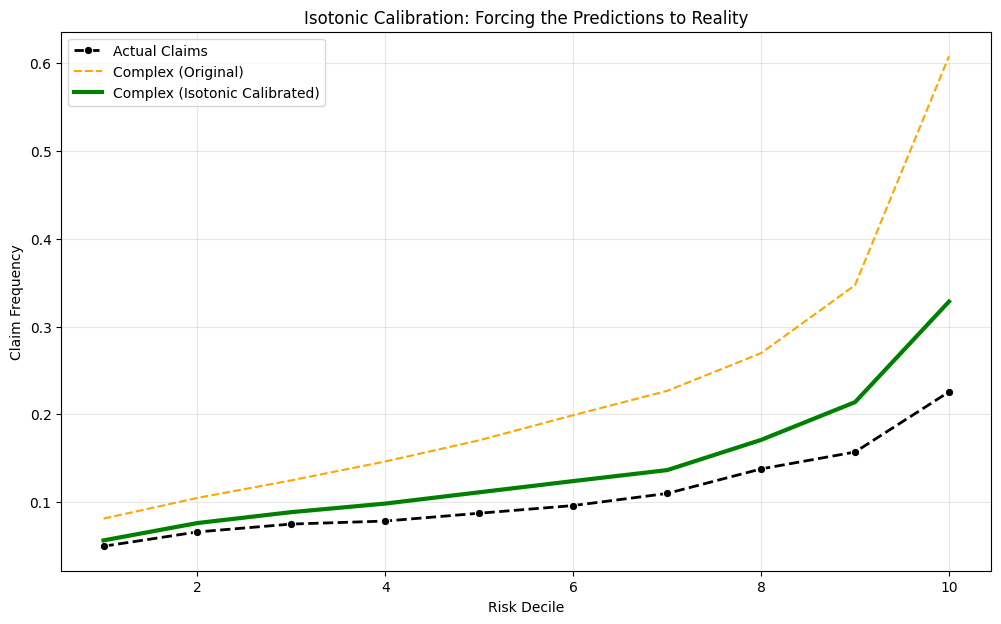

In [45]:
from sklearn.isotonic import IsotonicRegression

df_lift["Predicted_Complex_Clipped"] = df_lift["Predicted_Complex"].clip(upper=1.0)


X = df_lift["Predicted_Complex_Clipped"].values
y = df_lift["ClaimNb"].values


weights = df_lift["Exposure"].values


iso_reg = IsotonicRegression(y_min=0, increasing=True, out_of_bounds='clip')
iso_reg.fit(X, y, sample_weight=weights)


df_lift["Predicted_Calibrated"] = iso_reg.predict(X)


lift_calib = df_lift.groupby("Decile").apply(include_groups=False, func=
    lambda x: pd.Series({
        "Average_Actual": x["ClaimNb"].sum() / x["Exposure"].sum(),
        "Average_Aggressive": x["Predicted_Complex"].sum() / x["Exposure"].sum(),
        "Average_Calibrated": x["Predicted_Calibrated"].sum() / x["Exposure"].sum(), 
    })
).reset_index()

plt.figure(figsize=(12, 7))


sns.lineplot(data=lift_calib, x="Decile", y="Average_Actual", 
             color="black", linestyle="--", marker="o", linewidth=2, label="Actual Claims")


sns.lineplot(data=lift_calib, x="Decile", y="Average_Aggressive", 
             color="orange", linestyle="--", label="Complex (Original)")


sns.lineplot(data=lift_calib, x="Decile", y="Average_Calibrated", 
             color="green", linewidth=3, label="Complex (Isotonic Calibrated)")

plt.title("Isotonic Calibration: Forcing the Predictions to Reality")
plt.ylabel("Claim Frequency")
plt.xlabel("Risk Decile")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

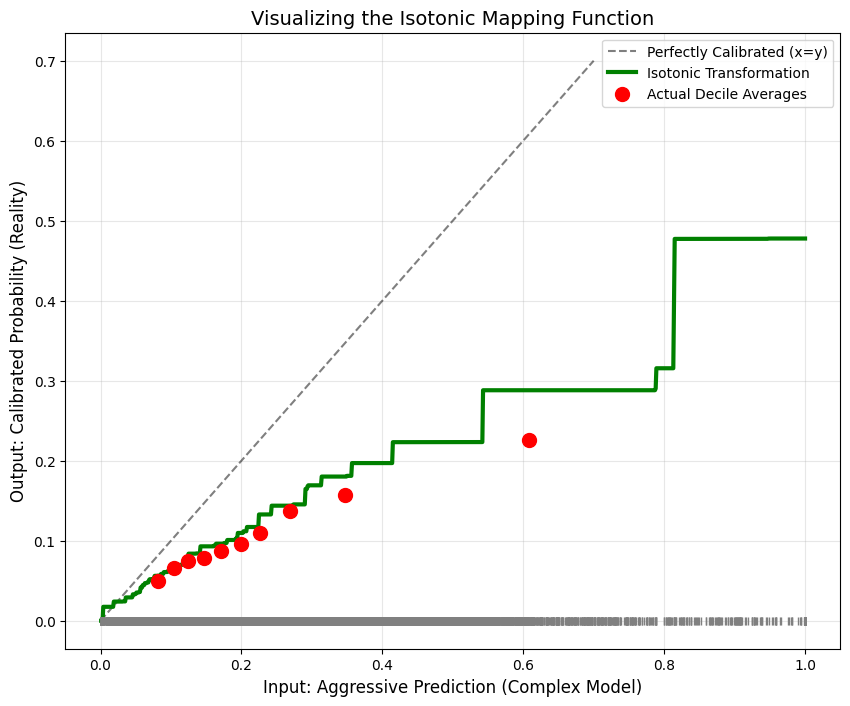

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

# 1. Generate a smooth range of inputs to visualize the "Function"
# We go from the min to max of your complex predictions
x_range = np.linspace(X.min(), X.max(), 1000)
y_iso_line = iso_reg.predict(x_range)

# 2. Prepare the Scatter Data (The "Truth" it tried to fit)
# We use the lift_calib aggregated data from the previous step
# because plotting 600,000 raw 0s and 1s is messy and unreadable.
scatter_x = lift_calib["Average_Aggressive"]
scatter_y = lift_calib["Average_Actual"]

# 3. Plotting
plt.figure(figsize=(10, 8))

# A. The Perfect Calibration Line (Reference)
plt.plot([0, 0.7], [0, 0.7], 'k--', label="Perfectly Calibrated (x=y)", alpha=0.5)

# B. The Isotonic Model (The Staircase)
plt.plot(x_range, y_iso_line, color='green', linewidth=3, label="Isotonic Transformation")

# C. The Actual Data (The Deciles)
plt.scatter(scatter_x, scatter_y, color='red', s=100, zorder=5, label="Actual Decile Averages")

# D. Step-by-Step Annotations
plt.title("Visualizing the Isotonic Mapping Function", fontsize=14)
plt.xlabel("Input: Aggressive Prediction (Complex Model)", fontsize=12)
plt.ylabel("Output: Calibrated Probability (Reality)", fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

# Optional: Add a 'rug' to show where your data density is
plt.plot(X, np.zeros_like(X), '|', color='gray', alpha=1, label="Data Density")


plt.show()

In [ ]:
import pandas as pd
import numpy as np

avg_severity = 3500
expense_ratio = 0.25
profit_margin = 0.05
tax_rate = 0.20

loading_factor = 1 / (1 - expense_ratio - profit_margin)


def calculate_commercial_premium(new_customer_data, glm_model, iso_model):

    raw_frequency = glm_model.predict(new_customer_data).clip(upper=1.0)
    calibrated_frequency = iso_model.predict(raw_frequency)
   
    pure_premium = calibrated_frequency * avg_severity
    net_premium = pure_premium * loading_factor
    gross_premium = net_premium * (1 + tax_rate)

    return np.round(gross_premium, 2)


customer_profile = pd.DataFrame([input("Enter DrivAge BonusMalus VehPower VehAge: ").split()], columns=["DrivAge", "BonusMalus", "VehPower", "VehAge"]).astype({"DrivAge": int, "BonusMalus": int, "VehAge": int}).assign(LogExposure=0.0)

price = calculate_commercial_premium(customer_profile, result_complex, iso_reg)
print(f"Recommended Commercial Premium: €{price.item()}")


Recommended Commercial Premium: €374.74
